In [1]:
from datetime import datetime
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance


In [2]:
## download the data
import pandas as pd
import tushare as ts
ts.set_token('0948b6427e46bb1bc7fa60b52df96ab0080b9d4ff80209a5fee99277')
pro = ts.pro_api()

df = pro.daily(ts_code='300654.SZ', start_date='20200101', end_date='20240101')
df['datetime'] = pd.to_datetime(df['trade_date'])
df = df.drop(['change', 'pre_close', 'pct_chg', 'amount'], axis=1)
df = df.rename(columns={'vol': 'volume'})
df.set_index('datetime', inplace=True)  # 设置索引覆盖原来的数据
df = df.sort_index(ascending=True)
df.to_csv('300654.SZ.csv', index=True, encoding='gbk')


In [3]:
df

,ts_code,trade_date,open,high,low,close,volume
datetime,,,,,,,
2020-01-02,300654.SZ,20200102,11.18,11.46,11.16,11.43,21780.39
2020-01-03,300654.SZ,20200103,11.49,11.70,11.38,11.53,24677.00
2020-01-06,300654.SZ,20200106,11.45,11.60,11.38,11.52,17073.00
2020-01-07,300654.SZ,20200107,11.52,11.95,11.49,11.88,29141.41
2020-01-08,300654.SZ,20200108,11.76,12.04,11.66,11.76,24331.41
...,...,...,...,...,...,...,...
2023-08-14,300654.SZ,20230814,11.12,11.83,11.06,11.81,222476.17
2023-08-15,300654.SZ,20230815,11.75,11.83,11.30,11.36,155983.09
2023-08-16,300654.SZ,20230816,11.44,11.57,10.88,10.93,146188.18


In [4]:
## read the data
stock = pd.read_csv('300654.SZ.csv', index_col=0, parse_dates=True)
stock

,ts_code,trade_date,open,high,low,close,volume
datetime,,,,,,,
2020-01-02,300654.SZ,20200102,11.18,11.46,11.16,11.43,21780.39
2020-01-03,300654.SZ,20200103,11.49,11.70,11.38,11.53,24677.00
2020-01-06,300654.SZ,20200106,11.45,11.60,11.38,11.52,17073.00
2020-01-07,300654.SZ,20200107,11.52,11.95,11.49,11.88,29141.41
2020-01-08,300654.SZ,20200108,11.76,12.04,11.66,11.76,24331.41
...,...,...,...,...,...,...,...
2023-08-14,300654.SZ,20230814,11.12,11.83,11.06,11.81,222476.17
2023-08-15,300654.SZ,20230815,11.75,11.83,11.30,11.36,155983.09
2023-08-16,300654.SZ,20230816,11.44,11.57,10.88,10.93,146188.18


In [5]:

start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)
data = bt.feeds.PandasData(dataname=stock, fromdate=start, todate=end) 


In [6]:
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
# cerebro.plot()  # and plot it with a single command

<IPython.core.display.Javascript object>


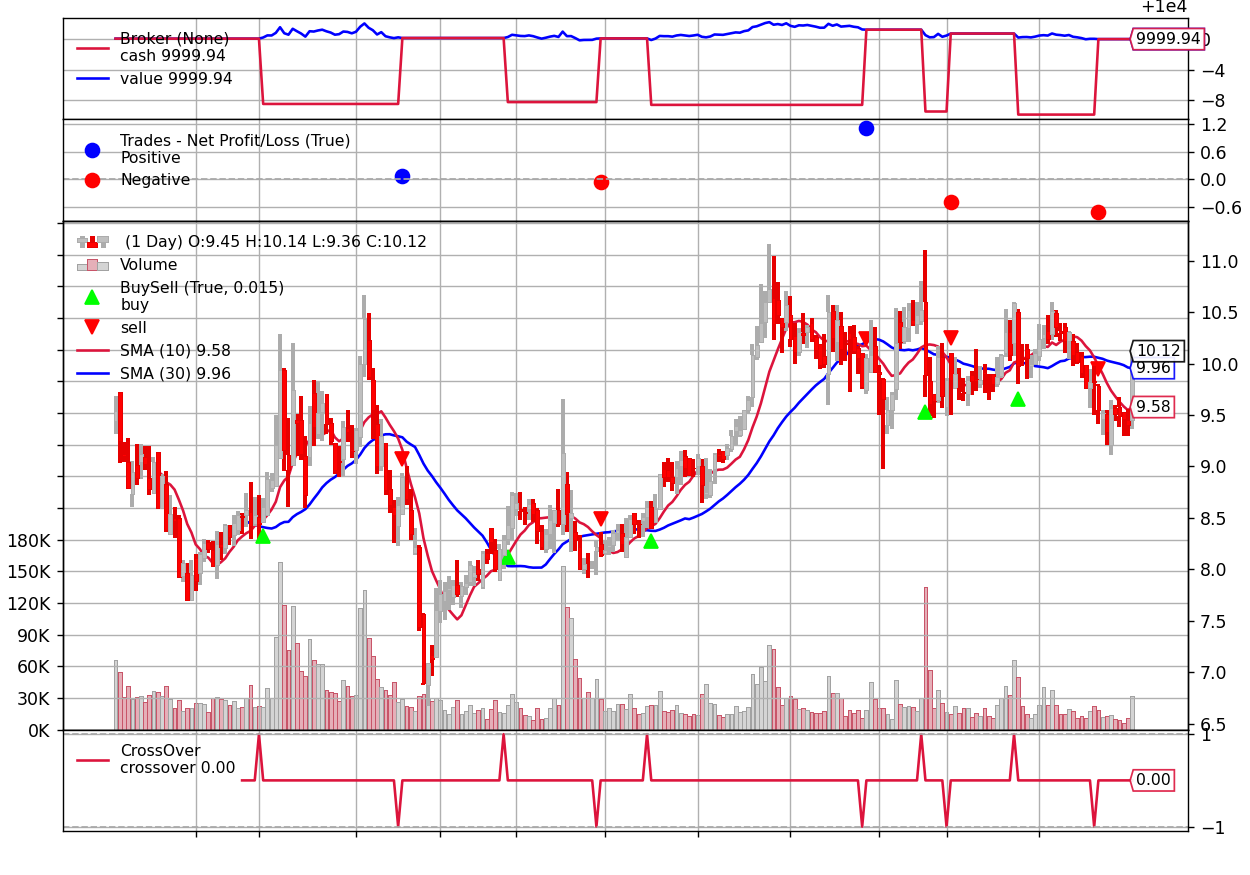

In [7]:
%matplotlib inline
fig = cerebro.plot(style='candlestick')
show = fig[0][0]
show.set_size_inches(10,7)#调整大小


